Netflix Data EDA

Dataset Link : Netflix Movies and TV Shows | Kaggle

1. How many records are in the dataset?

2. How many unique types (movies/TV-shows) are present in the dataset?

3. What is the distribution of ratings (G, PG, PG-13, etc.) in the dataset?

4. What is the average duration of movies and TV-shows?

5. Which director has the most content on Netflix?

6. Which country produces the most content on Netflix?

7. How has the number of content additions evolved over the years?

8. What are the top 5 countries with the highest average ratings?

9. What are the most common genres listed in the "listed_in" column?

10. What are the oldest and newest releases in the dataset?

11. Who are the top 5 most frequent actors/actresses in the "cast" column?

12. How many TV-shows and movies were added to Netflix each year?

13. What is the distribution of release years for movies and TV-shows?

14. What are the top 5 most common words in the "description" column?

15. Is there any correlation between the release year and the rating of content?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
286,s287,TV Show,Gabby's Dollhouse,NaN,"Laila Lockhart Kraner, Tucker Chandler, Juliet...",United States,"August 10, 2021",2021,TV-Y,2 Seasons,Kids' TV,"Cute cats, quirky crafts and colorful magic! J..."
1848,s1849,TV Show,Half & Half,NaN,"Rachel True, Essence Atkins, Telma Hopkins, Ch...",United States,"October 15, 2020",2005,TV-14,4 Seasons,TV Comedies,After two estranged half-sisters in their twen...
3092,s3093,TV Show,Kevin Hart: Don’t F**k This Up,NaN,NaN,United States,"December 27, 2019",2019,TV-MA,1 Season,Docuseries,"Amid turmoil in his career and marriage, comed..."
5665,s5666,TV Show,Color of Woman,NaN,"Jae Hee, Soo-kyung Lee, So-yi Yoon, Ji-ho Shim...",South Korea,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...",Two women at a cosmetics company compete for l...
4802,s4803,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...


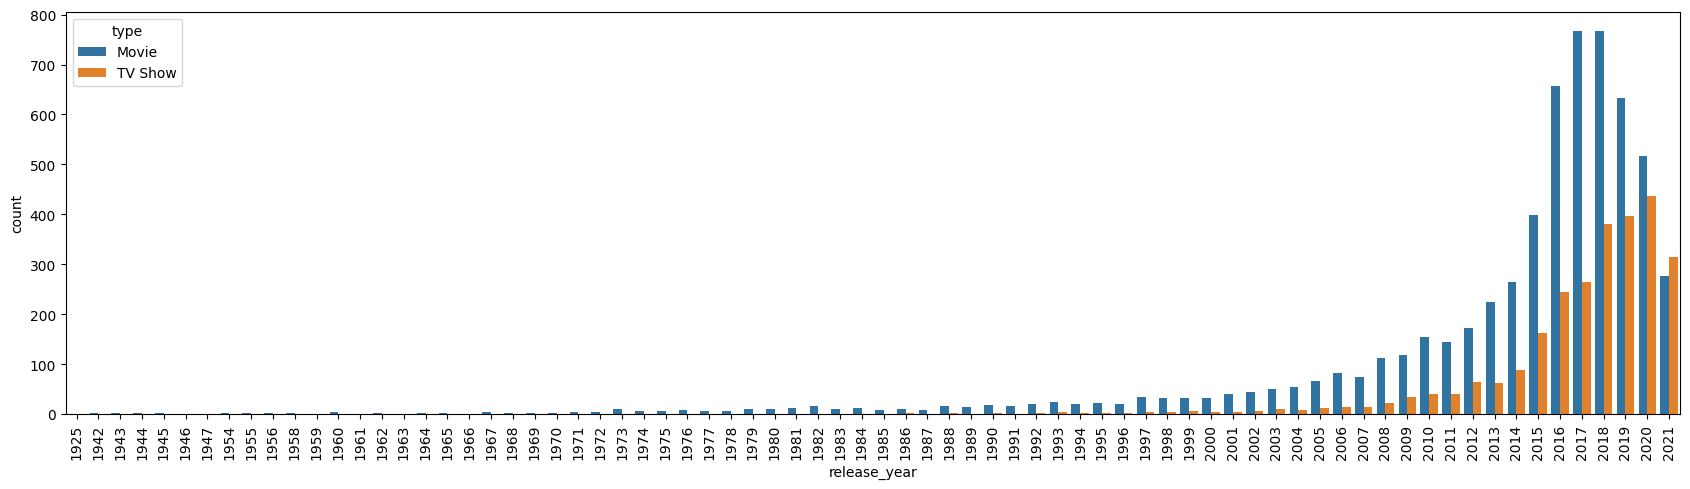

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(x='release_year', hue='type', data=df)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
df[['duration_pre','duration_suff']] = df.duration.str.split(expand=True)
df.duration_pre = pd.to_numeric(df.duration_pre, errors='coerce')

In [ ]:
df.describe()

,release_year,duration_pre
count,8807.000000,8804.000000
mean,2014.180198,69.846888
std,8.819312,50.814828
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [ ]:
df['type'].value_counts().reset_index()

,index,type
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type', ylabel='count'>

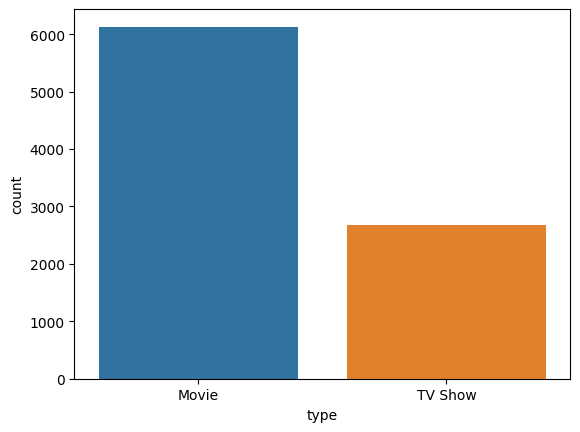

In [ ]:
sns.countplot(x='type', data=df)

In [ ]:
df.rating.value_counts().reset_index()

,index,rating
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


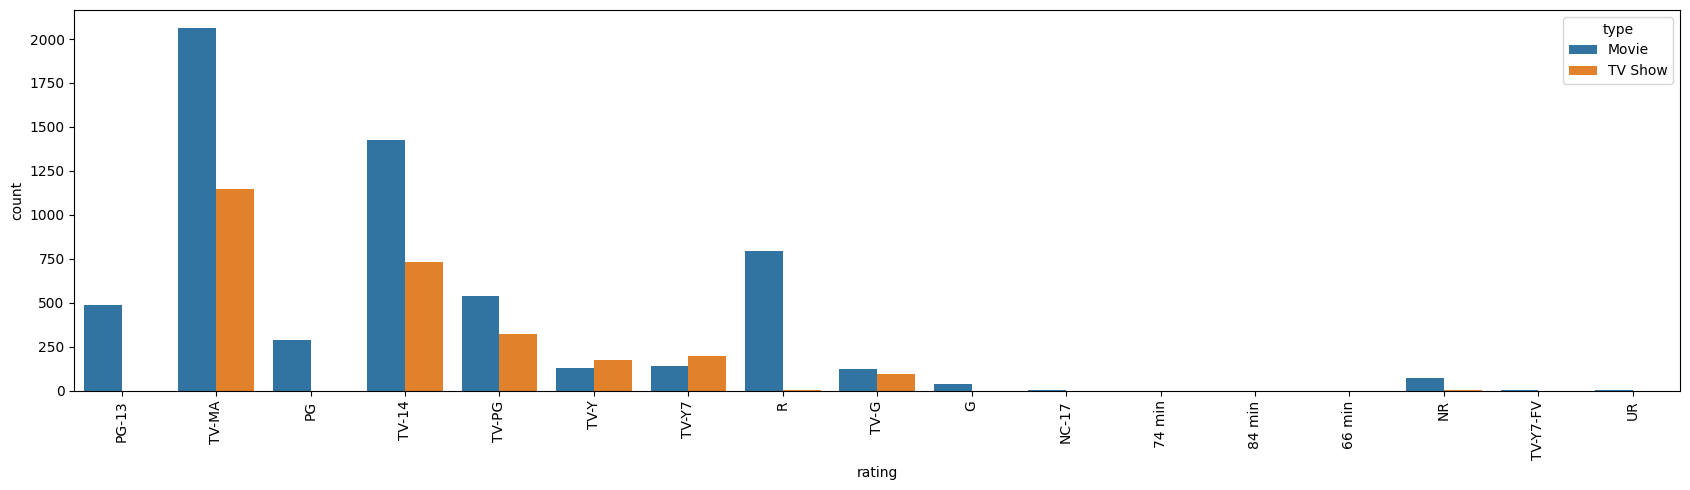

In [ ]:
plt.figure(figsize=(17,5))
sns.countplot(x='rating',hue='type', data=df)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
df[df['type'] == 'Movie']['duration_pre'].mean()

99.57718668407311

In [ ]:
df[df['type'] == 'TV Show']['duration_pre'].mean()

1.764947683109118

In [ ]:
df.director.value_counts().reset_index()

,index,director
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
...,...,...
4523,"Raymie Muzquiz, Stu Livingston",1
4524,Joe Menendez,1
4525,Eric Bross,1
4526,Will Eisenberg,1


In [ ]:
df.country.value_counts().reset_index()

,index,country
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


In [ ]:
df.groupby('release_year')['title'].count().sort_values(ascending=False).reset_index()

,release_year,title
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1959,1
70,1961,1
71,1947,1
72,1966,1


In [ ]:
df.groupby('country')['rating'].count().sort_values(ascending=False).reset_index()

,country,rating
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,244
4,South Korea,199
...,...,...
743,"Ireland, Canada, Luxembourg, United States, Un...",1
744,"Ireland, Canada, United Kingdom, United States",1
745,"Ireland, Canada, United States, United Kingdom",1
746,"Ireland, France, Iceland, United States, Mexic...",1


In [ ]:
pd.Series((','.join(df.listed_in)).split(',')).value_counts().reset_index()

,index,0
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,LGBTQ Movies,1
71,TV Sci-Fi & Fantasy,1


In [ ]:
#oldest releases
df[df['release_year'] <= 2000].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_pre,duration_suff
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161.0,min
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0,min


In [ ]:
#newest releases
df[df['release_year'] > 2000].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_pre,duration_suff
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season


In [ ]:
cast_split = df.cast.str.split(',').explode()
cast_split.value_counts().sort_values(ascending=False).reset_index()

,index,cast
0,Anupam Kher,39
1,Rupa Bhimani,31
2,Takahiro Sakurai,30
3,Julie Tejwani,28
4,Om Puri,27
...,...,...
39291,Sebastian Fräsdorf,1
39292,Caro Angus,1
39293,Bahni Turpin,1
39294,Tommy Redmond Hicks,1


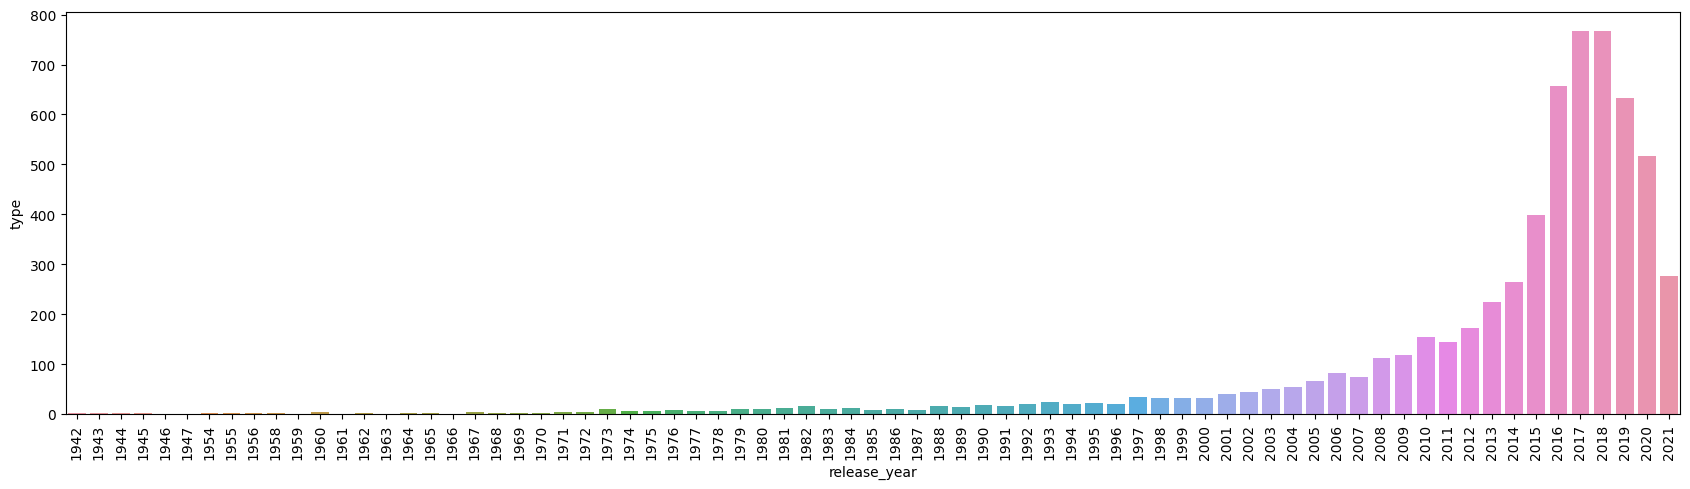

In [ ]:
m = df[df['type']=='Movie']
g = m.groupby('release_year')['type'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,5))
sns.barplot(x='release_year', y='type',data=g)
plt.xticks(rotation=90)
plt.tight_layout()

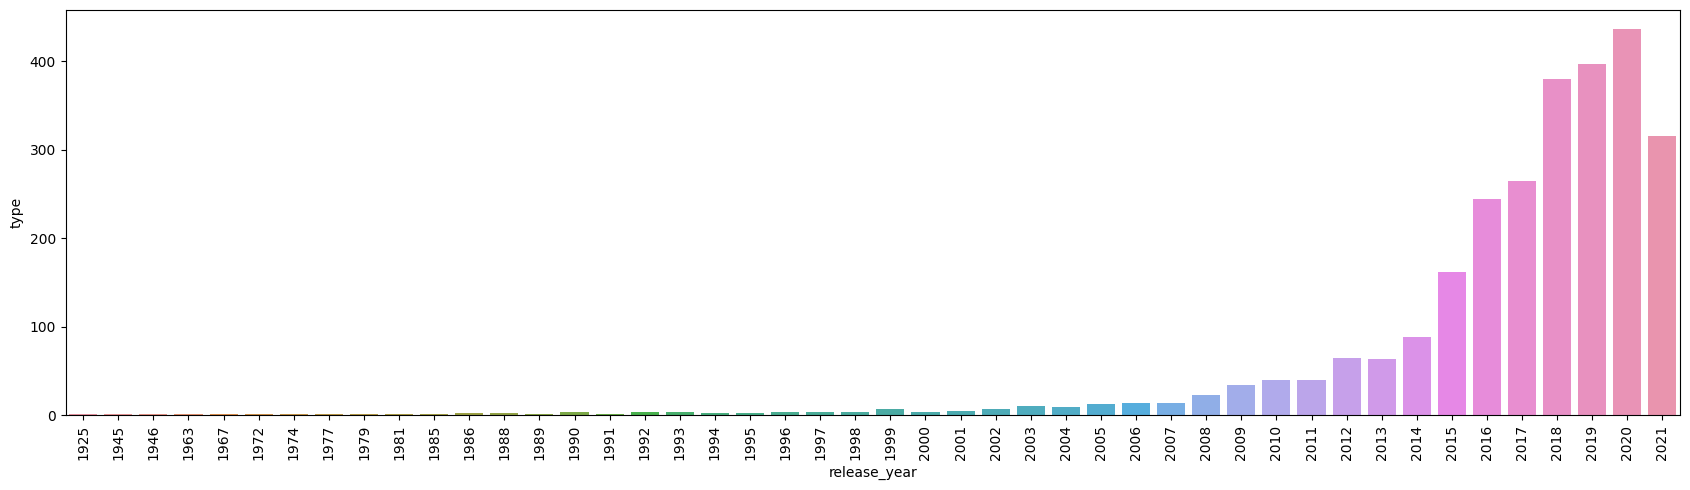

In [ ]:
t = df[df['type']=='TV Show']
h = t.groupby('release_year')['type'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(17,5))
sns.barplot(x='release_year', y='type',data=h)
plt.xticks(rotation=90)
plt.tight_layout()

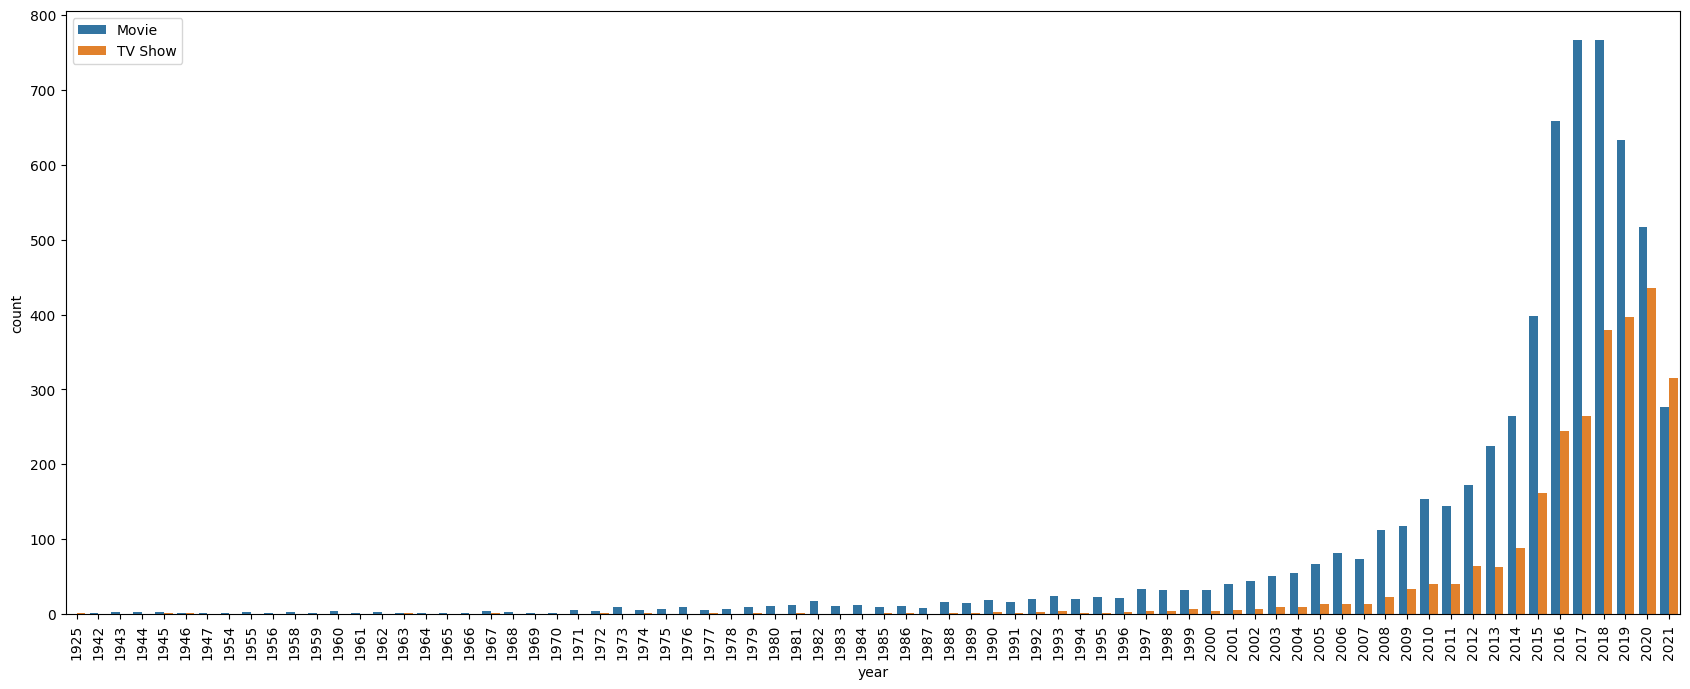

In [ ]:
y = df.groupby(['type', 'release_year']).size().reset_index()
y.columns = ['type', 'year', 'count']
plt.figure(figsize=(17,7))
sns.barplot(x='year', y='count', hue='type', data=y)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
j=df.description.str.split(',').explode()
j=j.str.split(' ').explode()
j.value_counts().reset_index()


,index,description
0,a,10108
1,,8824
2,the,7714
3,to,6343
4,and,6319
...,...,...
27176,"Bollywood""",1
27177,dessert,1
27178,euro,1
27179,duplicating,1


In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,release_year,duration_pre
release_year,1.000000,-0.249182
duration_pre,-0.249182,1.000000
